In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/spambase.csv"
SpamData = pd.read_csv(url)
print("Number of Observations: %i" %len(SpamData))


Number of Observations: 4601


In [3]:
SpamData.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


For the dictionary of this dataset pleaserefer to https://archive.ics.uci.edu/ml/datasets/Spambase

In [4]:
ListOfAllVariables = SpamData.columns.values
X = SpamData[ListOfAllVariables]
del X['is_spam']
y = SpamData['is_spam']


In [5]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver = 'newton-cg', max_iter = 100000)
lm.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
from sklearn.cross_validation import cross_val_score
print(cross_val_score(lm, X, y,cv=10).mean()) 
MisClassificationError = 1 - (cross_val_score(lm,X,y,cv=10).mean())
print(MisClassificationError)  #our misclassification Error is not bad!

0.917812605755
0.0821873942447


In [7]:
SpamData['is_spam'].describe() 
#We love misclassification error even more! (39%) of e-mails were spam

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_spam, dtype: float64

#### What is our current intercept?

In [8]:
lm.intercept_

array([-1.47735014])

### In our current setting 39% of our data was Spam. How would you adjust your model if you knew that in reality only 10% of e-mails are spam?

In [9]:
Pi = .1
Pi_tilda = .39
Adjusted_Intercept = lm.intercept_ + np.log(Pi / (1 - Pi)) - np.log(Pi_tilda / (1 - Pi_tilda))

print("We only need to adjust the intercept to %f" %Adjusted_Intercept)

We only need to adjust the intercept to -3.227262


## How much is our FPR, TPR, TNR, FNR, Error and Accuracy? 

In [10]:
from sklearn.metrics import confusion_matrix
y_hat = lm.predict(X)
confusion_matrix(y, y_hat)

array([[2665,  123],
       [ 190, 1623]])

In [12]:
confmat = confusion_matrix(y, y_hat)
TP = confmat[0,0] #True Positive
FP = confmat[1,0] #False Positive
FN = confmat[0,1] #False Negative
TN = confmat[1,1] #True Negative

In [13]:
Err = float(FP + FN)/(FP + FN + TP + TN) #Prediction Error
Acc = float(TP + TN)/(FP + FN + TP + TN) #Prediction Accuracy
FPR = float(FP)/(FP + TN)  #False Positive Rate
TNR = float(TN)/(FP + TN)  #True Negative Rate
TPR = float(TP)/(FN + TP)  #True Positive Rate
FNR = float(FN)/(FN + TP)  #False Negative Rate
print("False Positive Rate = %f" %FPR)
print("False Negative Rate = %f" %FNR)
print("True Positive Rate = %f" %TPR)
print("True Negative Rate = %f" %TNR)
print("Misclassification Error = %f" %Err)
print("Accuracy = %f" %Acc)

False Positive Rate = 0.104799
False Negative Rate = 0.044118
True Positive Rate = 0.955882
True Negative Rate = 0.895201
Misclassification Error = 0.068029
Accuracy = 0.931971


#### As you can see it is not that hard to get confused by outputs of the confusion matrix! Let's write our own function!

In [14]:
def Not_Confusion_Matrix(confmat, ErrType):
    TP = confmat[0,0] #True Positive
    FP = confmat[1,0] #False Positive
    FN = confmat[0,1] #False Negative
    TN = confmat[1,1] #True Negative
    if ErrType == 'Err':
        return float(FP + FN)/(FP + FN + TP + TN)
    elif ErrType == 'Acc':
        return float(TP + TN)/(FP + FN + TP + TN)
    elif ErrType == 'FPR':
        return float(FP)/(FP + TN)
    elif ErrType == 'TNR':
        return float(TN)/(FP + TN)
    elif ErrType == 'TPR':
        return float(TP)/(FN + TP)
    elif ErrType == 'FNR':
        return float(FN)/(FN + TP)
    else:
        print("You must input 'Err', 'Acc', 'FPR', 'TNR', 'TPR', or 'FNR' as your input")
        return "NaN"

In [15]:
InputTypes = ['Err', 'Acc', 'FPR', 'TNR', 'TPR', 'FNR']
for i in InputTypes:
    print("%s = %f" %(i , Not_Confusion_Matrix(confmat, i)))

Err = 0.068029
Acc = 0.931971
FPR = 0.104799
TNR = 0.895201
TPR = 0.955882
FNR = 0.044118


## Now let's explore threshhold

In [16]:
def PredictThreshhold(Predictprob, Threshhold): 
        y_predict = 0
        if (Predictprob >= Threshhold):
            y_predict = 1
        return y_predict
   

In [17]:
y_hat_probability = lm.predict_proba(X).T[1]
ThreshholdRange =  np.linspace(0, 1, 100)

In [18]:
FPR_List = []
FNR_List = []
TPR_List = []
Err_List = []

for i in ThreshholdRange:
    y_hat_predict_threshhold = []
    for j in range(0,len(y_hat_probability)):
            y_hat_predict_threshhold.append(PredictThreshhold(y_hat_probability[j],i))
            
    confmat = confusion_matrix(y, y_hat_predict_threshhold)
    FPR_List.append(Not_Confusion_Matrix(confmat, 'FPR'))
    FNR_List.append(Not_Confusion_Matrix(confmat, 'FNR'))
    Err_List.append(Not_Confusion_Matrix(confmat, 'Err'))
    TPR_List.append(Not_Confusion_Matrix(confmat, 'TPR'))


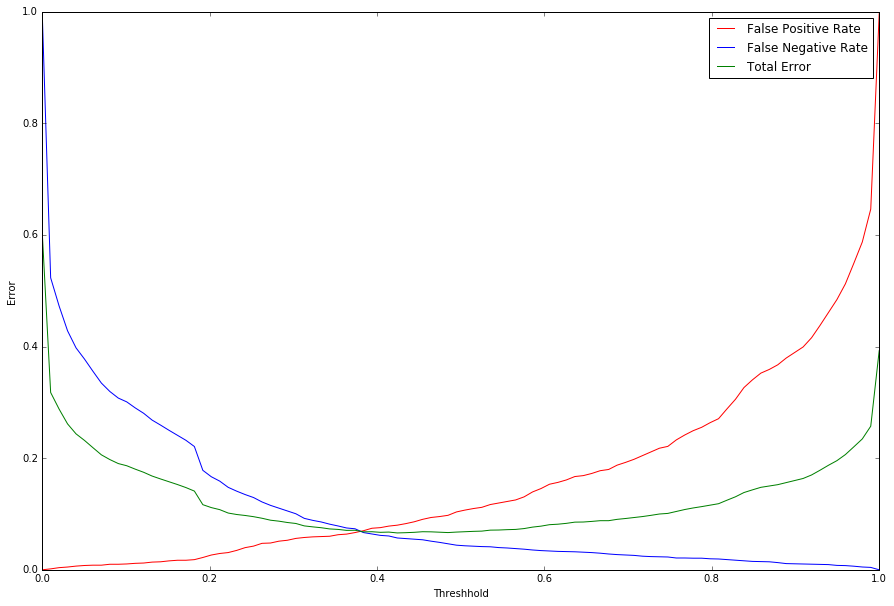

In [19]:
plt.figure(figsize=(15,10))

plt.plot(ThreshholdRange, FPR_List, color = 'r', label = 'False Positive Rate')
plt.plot(ThreshholdRange, FNR_List, color = 'b', label = 'False Negative Rate')
plt.plot(ThreshholdRange, Err_List, color = 'g', label = 'Total Error')
plt.xlabel("Threshhold")
plt.ylabel("Error")
plt.legend()
plt.show()

As you can see in the above graph. Although, total error is minimized at Threshhold = 0.5, it was pretty flat from Thresshold = 0.2 to Thresshold = 0.7. So, if our goal is to minimize False Positive rate while not damage total error that much, we could reduce Thresshold to 0.2. On the other hand, if our goal was minimizing false negatives while keeping total error low, we would set our threshhold close to 0.7 or even 0.75.

### To clarify, let's check confusion matrix for Threshhold = 0.2, 0.5, and 0.75

In [20]:
# Set Thresshold = 0.2
y_hat_predict_threshhold= []
for i in range(0,len(y_hat_probability)):
        y_hat_predict_threshhold.append(PredictThreshhold(y_hat_probability[i], .2))
print(confusion_matrix(y, y_hat_predict_threshhold))

[[2316  472]
 [  48 1765]]


In [21]:
# Set Thresshold = 0.5

y_hat_predict_threshhold= []
for i in range(0,len(y_hat_probability)):
        y_hat_predict_threshhold.append(PredictThreshhold(y_hat_probability[i], .5))
print(confusion_matrix(y, y_hat_predict_threshhold))

[[2665  123]
 [ 190 1623]]


In [22]:
# Set Thresshold = 0.75

y_hat_predict_threshhold= []
for i in range(0,len(y_hat_probability)):
        y_hat_predict_threshhold.append(PredictThreshhold(y_hat_probability[i], .75))
print(confusion_matrix(y, y_hat_predict_threshhold))

[[2725   63]
 [ 404 1409]]


# ROC Curves


#### First Approach: Using the results of our own function. Remember ROC is FPR vs TPR

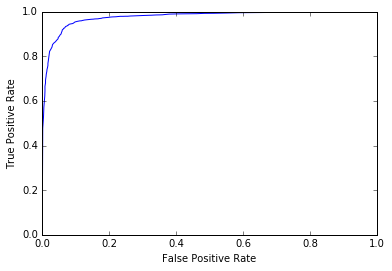

In [23]:
plt.plot(FPR_List, TPR_List)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


#### Second Approach: Using Python libraries 
Read more about ROC curves in puthon [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

In [24]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_hat_probability = lm.predict_proba(X).T[1]  
#T means Transpose
#predict_proba(X).T[1] returns probability of belongingness to a class

print(y_hat_probability)
print("AUC is %f " %roc_auc_score(y, y_hat_probability)) 
#This is excellent

vals = roc_curve(y, y_hat_probability) 
#vals[0] is False Positive Rate
#vals[1] is True Positive Rate

[ 0.59860371  0.97453442  0.99998117 ...,  0.03483669  0.09626789
  0.04320134]
AUC is 0.975719 


# Now Let's plot ROC Curves

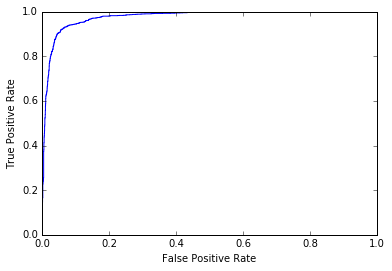

In [25]:
plt.plot(vals[0], vals[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Bonus section: Now let's find out the most important variables

In [26]:
# let's first standardize our data
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

NameOfVariables = X.columns.values
for i in NameOfVariables:
    SpamData[i] = Standardize(SpamData[i])
X = SpamData[ListOfAllVariables]
del X['is_spam']  

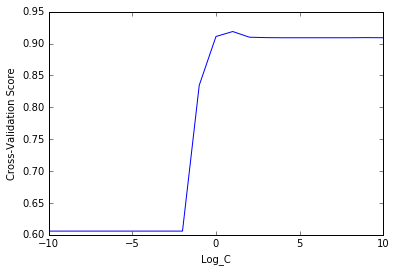

In [27]:
# Try testing and plot
c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)
#C is just the inverse of Lambda - the smaller the C - the stronger the
#regulatization. The smaller C's select less variables
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score, penalty = "l1")
    cv_scores.append(cross_val_score(lm, X, y, cv=10, scoring = 'accuracy').mean())

plt.plot(c_index, cv_scores)
plt.xlabel("Log_C")
plt.ylabel("Cross-Validation Score")
plt.show()



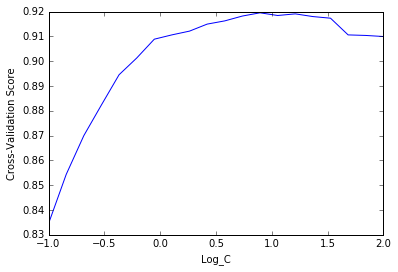

In [28]:
# Try testing and plot
c_list = np.logspace(-1,2,20) 
c_index = np.linspace(-1,2,20)
#C is just the inverse of Lambda - the smaller the C - the stronger the
#regulatization. The smaller C's choose less variables
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score, penalty = "l1")
    cv_scores.append(cross_val_score(lm,X,y,cv=10).mean())

plt.plot(c_index, cv_scores)
plt.xlabel("Log_C")
plt.ylabel("Cross-Validation Score")
plt.show()


In [29]:
lm = LogisticRegression(C = 10**(1), penalty = "l1")
lm.fit(X,y)
lm.coef_


array([[ -1.47102707e+00,  -2.04439415e+00,   7.44210639e-01,
          1.13347307e+01,   5.54922740e+00,   4.46096974e+00,
          1.69411522e+01,   6.22241226e+00,   3.43102279e+00,
          2.09275383e+00,  -4.76692638e-01,  -1.40778193e+00,
         -2.65612346e-01,   1.14926800e+00,   5.10867009e+00,
          2.03297141e+01,   6.52779621e+00,   1.18175847e+00,
          1.52548934e+00,   1.37659200e+01,   2.68277884e+00,
          5.05494052e+00,   1.24560938e+01,   6.20767972e+00,
         -3.81204632e+01,  -1.52789324e+01,  -1.41444250e+02,
          3.30390019e+00,  -1.83953338e+01,  -1.81946077e+00,
         -1.11997253e+00,   0.00000000e+00,  -1.38591265e+01,
          0.00000000e+00,  -1.89551385e+01,   6.18756436e+00,
         -2.61608581e-02,  -3.83266287e+00,  -7.64690957e+00,
         -1.11657280e+00,  -4.01982082e+01,  -2.70137047e+01,
         -3.34919045e+00,  -2.31453989e+01,  -1.52623102e+01,
         -2.91781551e+01,  -4.10758851e+00,  -2.36506233e+01,
        

In [30]:
Var_coef = zip(lm.coef_[0,:],NameOfVariables)
sorted(Var_coef)

[(-141.44424965631325, 'word_freq_george'),
 (-40.19820823132072, 'word_freq_cs'),
 (-38.120463192178455, 'word_freq_hp'),
 (-29.178155130624091, 'word_freq_edu'),
 (-27.013704673406643, 'word_freq_meeting'),
 (-23.650623322117674, 'word_freq_conference'),
 (-23.14539891928553, 'word_freq_project'),
 (-18.955138533150517, 'word_freq_85'),
 (-18.395333825080037, 'word_freq_lab'),
 (-15.278932418290669, 'word_freq_hpl'),
 (-15.262310207148872, 'word_freq_re'),
 (-13.85912652188426, 'word_freq_data'),
 (-7.6469095723164413, 'word_freq_pm'),
 (-5.331610197651738, 'char_freq_;'),
 (-4.1075885102009178, 'word_freq_table'),
 (-3.8326628689461506, 'word_freq_parts'),
 (-3.3491904542844053, 'word_freq_original'),
 (-2.0465261296070976, 'char_freq_['),
 (-2.0443941493853042, 'word_freq_address'),
 (-1.8194607715412789, 'word_freq_labs'),
 (-1.4710270672263976, 'word_freq_make'),
 (-1.4077819276400148, 'word_freq_will'),
 (-1.1578255458661983, 'char_freq_('),
 (-1.1199725292133775, 'word_freq_tel

It seems like char_freq_$ has the highest effect on an email be a spam, the next word that highly affects the probability of spam is remove, followed by  free, #, remove, credit, 000 etc.

The most unlikely characters that are in spam emails are george, cs, hp, edu, meeting, etc.. 


#### Now let's look at ROC, AUC, confusion matrix of our optimal model

In [31]:
y_hat = lm.predict(X)
confusion_matrix(y, y_hat)

array([[2668,  120],
       [ 194, 1619]])

0.976196839975


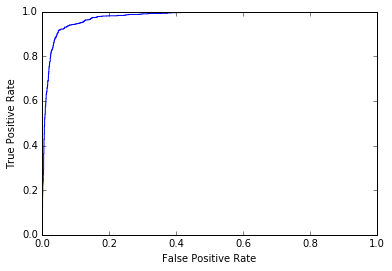

In [32]:
y_hat_probability = lm.predict_proba(X).T[1]  #T[1] returns probability of belonging to class
print(roc_auc_score(y, y_hat_probability))
vals = roc_curve(y, y_hat_probability)

plt.plot(vals[0], vals[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()